In [59]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from cycler import cycler
import astropy.constants as const
from scipy.optimize import curve_fit
from scipy.odr import Model, ODR, RealData
import os

textwidth=.7

# fonts
fsize = 14*textwidth
tsize = 14*textwidth

# lines
lwidth = 1.5
lhandle = 2.0

# figsize
fwidth = 6.05434*textwidth
fheight = 4.540755*textwidth

colors = cycler('color', ['navy', 'orange', 'green', 'red', 'm', 'deepskyblue'])

plt.rcParams['text.usetex'] = True

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = (fwidth, fheight)
plt.rcParams['axes.prop_cycle'] = colors
plt.rcParams['font.family'] = 'Roboto'
plt.rcParams['xtick.major.width'] = 1.0
plt.rcParams['xtick.minor.width'] = 1.0
plt.rcParams['xtick.major.size'] = 8.0
plt.rcParams['xtick.minor.size'] = 4.0
plt.rcParams['ytick.major.width'] = 1.0
plt.rcParams['ytick.minor.width'] = 1.0
plt.rcParams['ytick.major.size'] = 8.0
plt.rcParams['ytick.minor.size'] = 4.0
plt.rcParams['xtick.direction'] = "in"
plt.rcParams['ytick.direction'] = "in"

plt.rcParams['font.size'] = fsize
plt.rcParams['legend.fontsize'] = tsize
plt.rcParams['axes.linewidth'] = lwidth
plt.rcParams['legend.handlelength'] = lhandle

def fit(f, x, y, p0, sx=None, sy=None):
	"""
	fit unsing scipy.odr
	:params:
	f : func(p, x) with p a list of params
	x : x data
	y : y data
	sx: x error
	sy: y error
	p0: initial guesses
	"""
	function = Model(f)

	data = RealData(x, y, sx=sx, sy=sy)

	odr = ODR(data, function, beta0=p0)

	out = odr.run()

	print(out.pprint())

	return out.beta, out.sd_beta




In [60]:
# os.system("ls -d sampling_data/*/ > sampling_data/directories.txt")

0

In [61]:
dir_list = np.array(open("sampling_data/directories.txt").read().split("\n"))[:-1]
dir_list

array(['sampling_data/stars_flip_lay_4_bins_64/',
       'sampling_data/stars_permute_lay_4_bins_64/'], dtype='<U42')

In [62]:
smp_rrlyrae, smp_stars = [], []
for DIR in dir_list:
    smp_rrlyrae.append(np.load(f"{DIR}rrlyrae.npy"))
    smp_stars.append(np.load(f"{DIR}stars.npy"))
X_rrlyrae = np.load(dir_list[0]+"X_rrlyrae.npy")
X_stars = np.load(dir_list[0]+"X_stars.npy")

features = "u-g g-r r-i i-z".split()

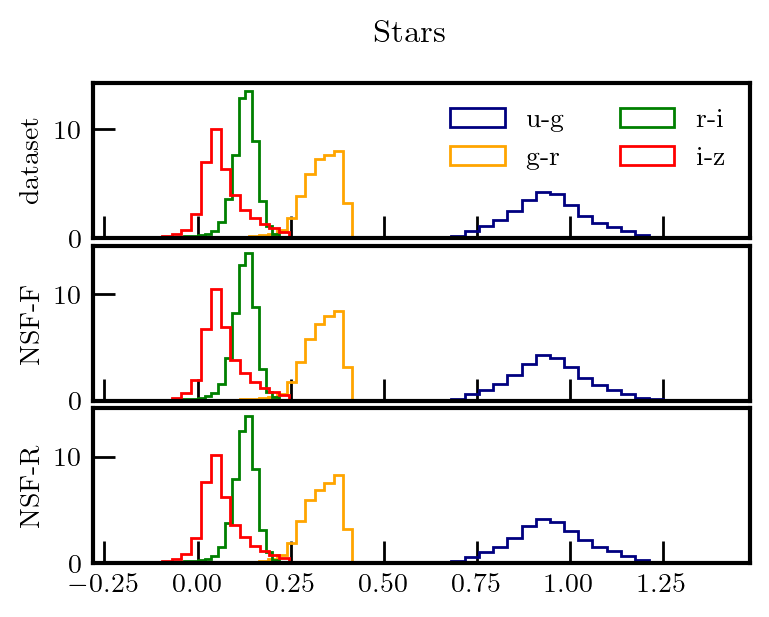

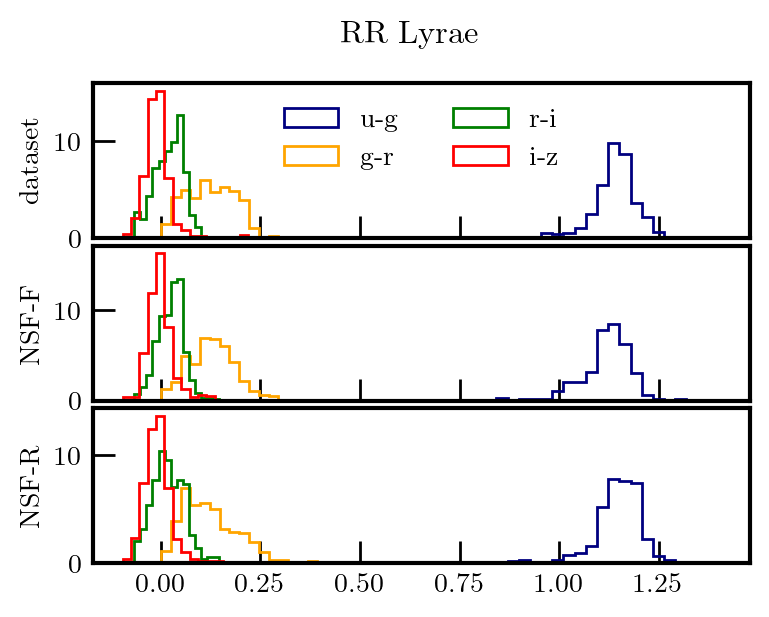

In [63]:
fig, (ax2, ax1, ax3) = plt.subplots(3, 1, sharex=True)
plt.subplots_adjust(hspace=.05)

for i in range(4):
    hist_range = (smp_stars[0][:, i].min(), smp_stars[0][:, i].max())
    _ = ax1.hist(smp_stars[0][:, i], bins=20, histtype="step", label=features[i], density=True, range=hist_range)
    _ = ax3.hist(smp_stars[1][:, i], bins=20, histtype="step", label=features[i], density=True, range=hist_range)
    _ = ax2.hist(X_stars[:, i], bins=20, histtype="step", label=features[i], density=True, range=hist_range)
    
ax2.legend(loc="best", ncol=2, frameon=False)
ax1.set_ylabel("NSF-F")
ax3.set_ylabel("NSF-R")
ax2.set_ylabel("dataset")
plt.suptitle("Stars")

plt.savefig("figs/samples_stars.pdf", bbox_inches="tight")

fig, (ax2, ax1, ax3) = plt.subplots(3, 1, sharex=True)
plt.subplots_adjust(hspace=.05)

for i in range(4):
    hist_range = (smp_rrlyrae[0][:, i].min(), smp_stars[0][:, i].max())
    _ = ax1.hist(smp_rrlyrae[0][:, i], bins=20, histtype="step", label=features[i], density=True, range=hist_range)
    _ = ax3.hist(smp_rrlyrae[1][:, i], bins=20, histtype="step", label=features[i], density=True, range=hist_range)
    _ = ax2.hist(X_rrlyrae[:, i], bins=20, histtype="step", label=features[i], density=True, range=hist_range)
    
ax2.legend(loc="upper center", ncol=2, frameon=False)
ax1.set_ylabel("NSF-F")
ax3.set_ylabel("NSF-R")
ax2.set_ylabel("dataset")
plt.suptitle("RR Lyrae")

plt.savefig("figs/samples_rrlyrae.pdf", bbox_inches="tight")
# plt.savefig("figs/sample_hists/best-Layers_64.pdf")

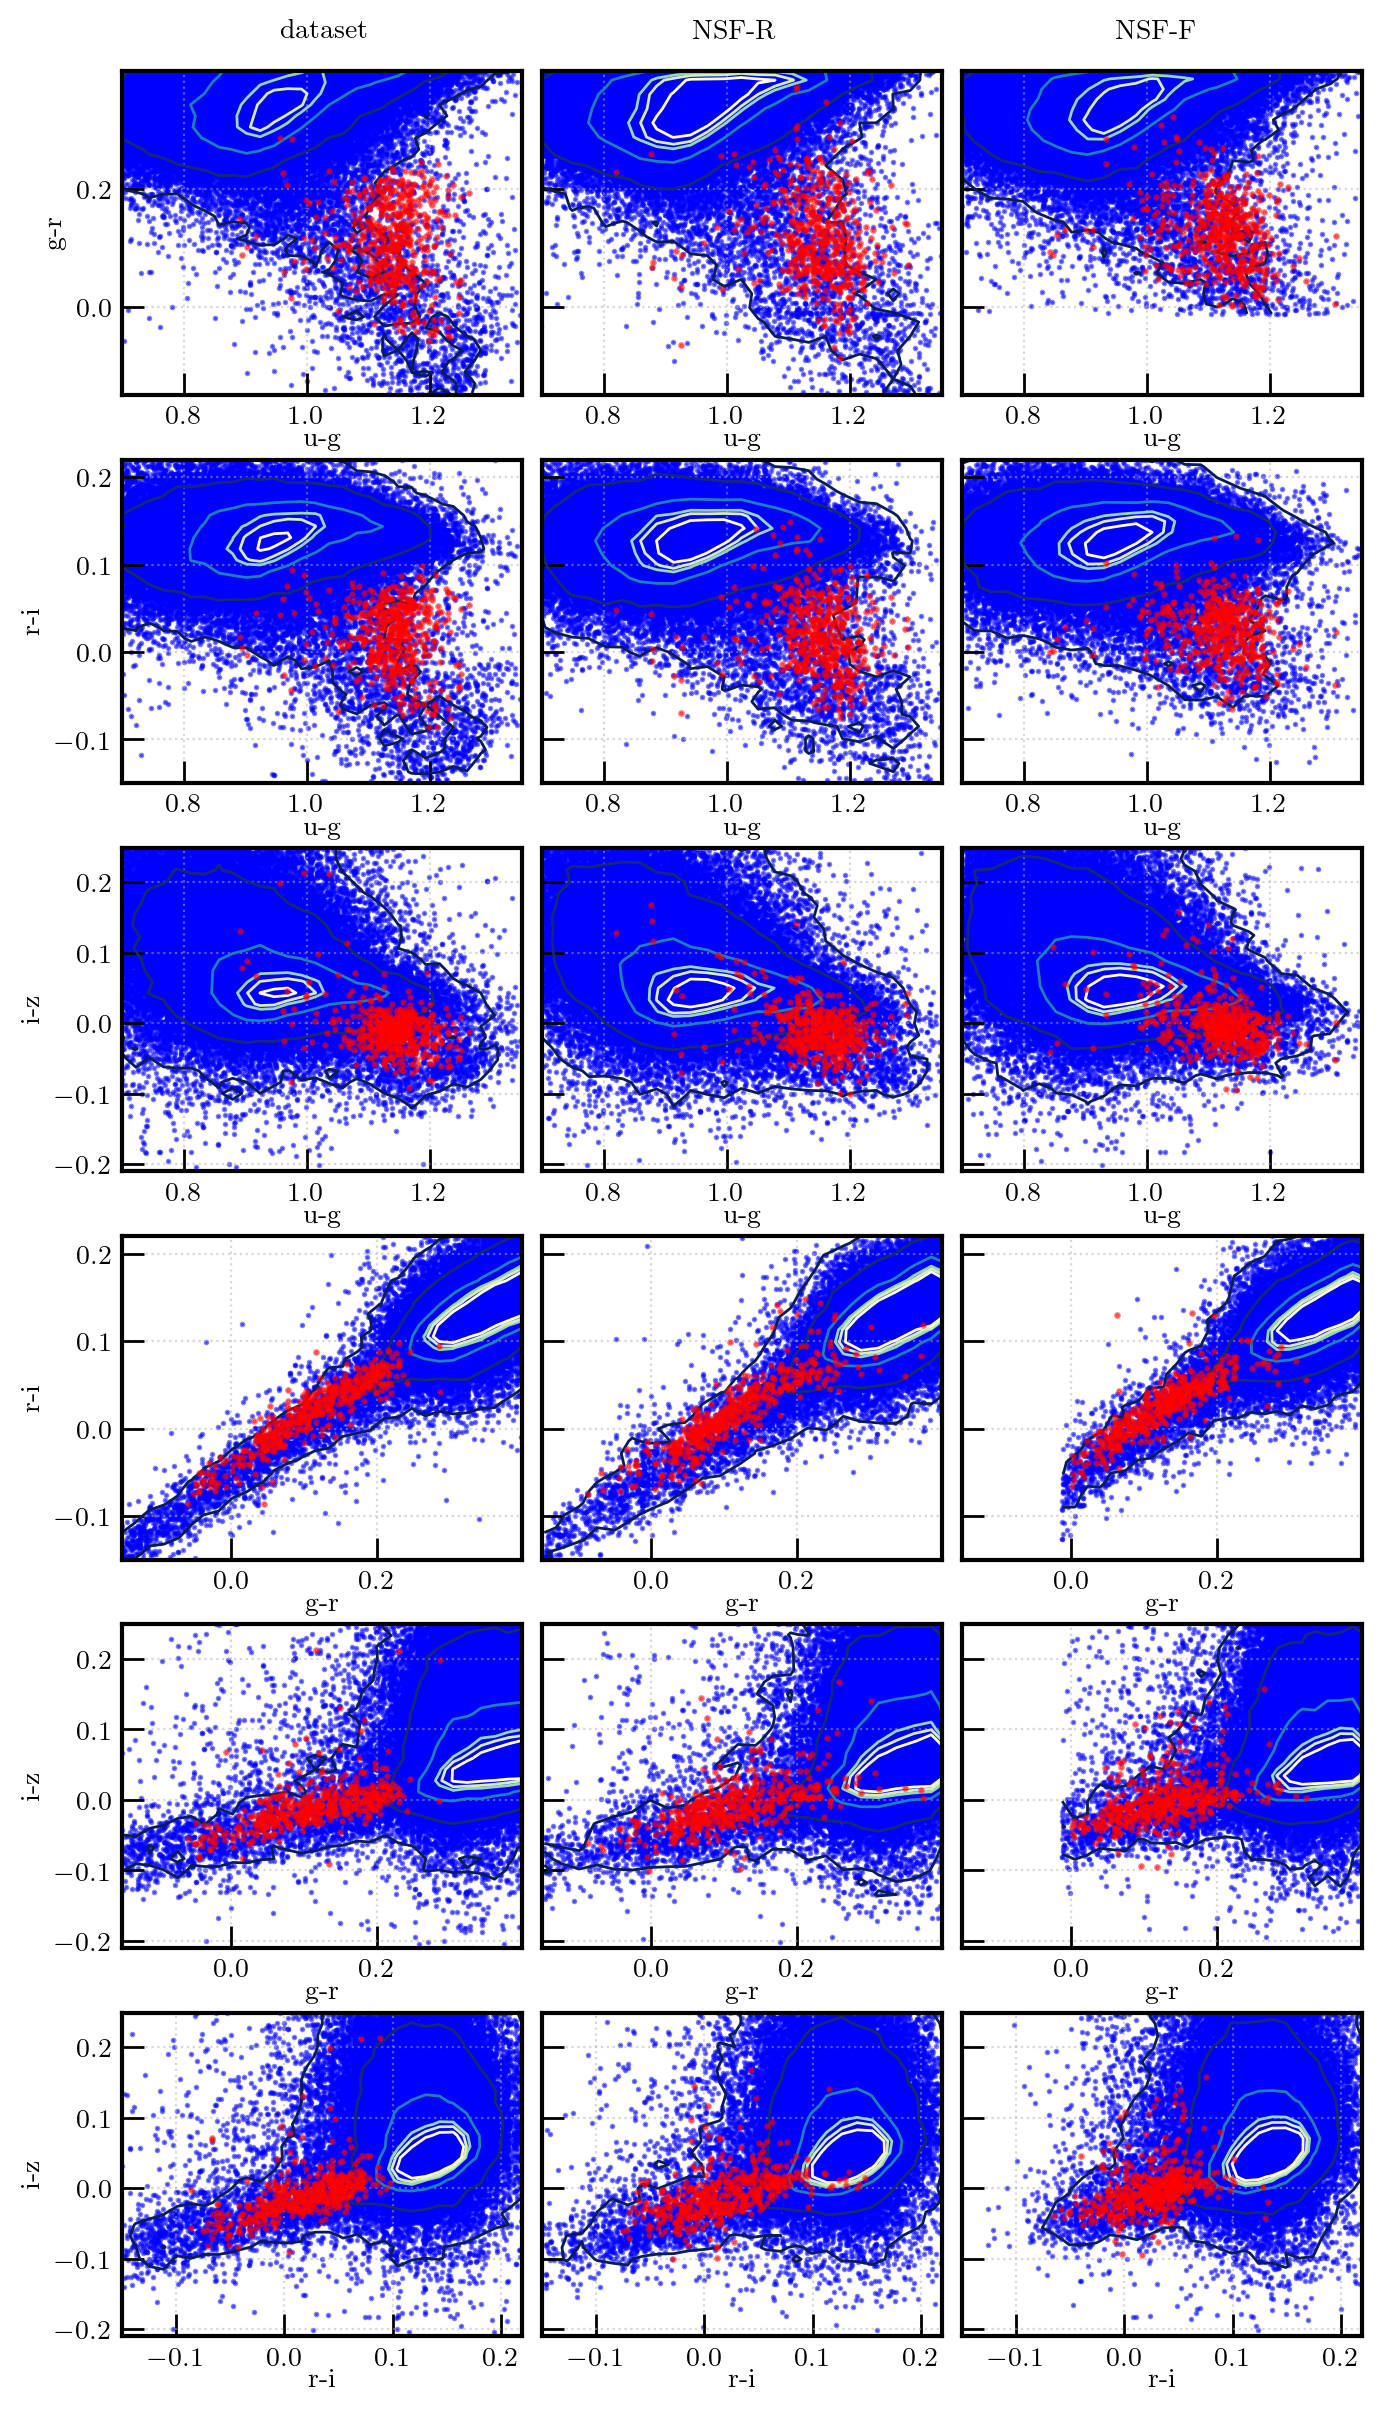

In [64]:
# names of the features, i. e. color magnitudes
features = "u-g g-r r-i i-z".split()

#----------------------------------------------------------------------
# # get data and split into training & testing sets
# X, y = fetch_rrlyrae_combined()

# X = X[-5000:]
# y = y[-5000:]

# stars = (y == 0)
# rrlyrae = (y == 1)

# make six subplots
fig, axes = plt.subplots(6, 3, 
                         figsize=(8,15), 
                         dpi=200, 
                         # sharex="row", 
                         # sharey="row",
#                          constrained_layout=True
                        )

axes = axes.flatten() # 1D array

# set the spacing between subplots
plt.subplots_adjust(wspace=0.05, 
                    hspace=0.2)

ax_cnt = 0

for i in range(len(features)):
    for j in range(i+1, len(features)):
        # REAL
        
        ax = axes[ax_cnt]
        ax.scatter(X_stars[:, i], X_stars[:, j], s=1, c='b', alpha=.5, label='stars')
        ax.scatter(X_rrlyrae[:, i], X_rrlyrae[:, j], s=2, c='r', alpha=.5, label='RR-Lyrae', zorder=11)
        
        H, xbins, ybins = np.histogram2d(X_stars[:, i], X_stars[:, j], bins=30)
        extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]       
        ax.contour(H.T, extent=extent, linewidths=1, levels=[10, 100, 500, 1000, 1200, 1500], cmap=plt.cm.YlGnBu_r)

        ax.set_xlabel(features[i], labelpad=-.8)
        ax.set_ylabel(features[j])
        
        ax.set_xlim(X_stars[:, i].min(), X_stars[:, i].max())
        ax.set_ylim(X_stars[:, j].min(), X_stars[:, j].max())

        ax.grid(alpha=.5, linestyle=":")
        # ax.legend(loc="upper left")

        ax_cnt += 1
        
        # SAMPLE R
        
        ax = axes[ax_cnt]
        ax.scatter(smp_stars[1][:, i], smp_stars[1][:, j], s=1, c='b', alpha=.5, label='stars')
        ax.scatter(smp_rrlyrae[1][:, i], smp_rrlyrae[1][:, j], s=2, c='r', alpha=.5, label='RR-Lyrae', zorder=11)
        
        H, xbins, ybins = np.histogram2d(smp_stars[1][:, i], smp_stars[1][:, j], bins=30)
        extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]       
        ax.contour(H.T, extent=extent, linewidths=1, levels=[10, 100, 500, 1000, 1200, 1500], cmap=plt.cm.YlGnBu_r)

        ax.set_xlabel(features[i], labelpad=-.8)
        ax.set_yticklabels([])
        
        ax.set_xlim(X_stars[:, i].min(), X_stars[:, i].max())
        ax.set_ylim(X_stars[:, j].min(), X_stars[:, j].max())

        ax.grid(alpha=.5, linestyle=":")
        # ax.legend(loc="upper left")       
        
        ax_cnt += 1

        
        # SAMPLE F
        
        ax = axes[ax_cnt]
        ax.scatter(smp_stars[0][:, i], smp_stars[0][:, j], s=1, c='b', alpha=.5, label='stars')
        ax.scatter(smp_rrlyrae[0][:, i], smp_rrlyrae[0][:, j], s=2, c='r', alpha=.5, label='RR-Lyrae', zorder=11)
        
        H, xbins, ybins = np.histogram2d(smp_stars[0][:, i], smp_stars[0][:, j], bins=30)
        extent = [xbins[0], xbins[-1], ybins[0], ybins[-1]]       
        ax.contour(H.T, extent=extent, linewidths=1, levels=[10, 100, 500, 1000, 1200, 1500], cmap=plt.cm.YlGnBu_r)

        ax.set_xlabel(features[i], labelpad=-.8)
        ax.set_yticklabels([])
        
        ax.set_xlim(X_stars[:, i].min(), X_stars[:, i].max())
        ax.set_ylim(X_stars[:, j].min(), X_stars[:, j].max())

        ax.grid(alpha=.5, linestyle=":")
        # ax.legend(loc="upper left")

        ax_cnt += 1

plt.text(0.03, 3.05, f"NSF-F", ha="center")
plt.text(-0.74, 3.05, f"dataset", ha="center")
plt.text(-0.36, 3.05, f"NSF-R", ha="center")

plt.savefig("figs/samples_2d.png", bbox_inches="tight")